In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [11]:
#Data_set=pd.read_csv("Spam.xls")

with open("spambase/spambase.names") as spam:
 text = spam.read()
labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
df = pd.read_csv("spambase/spambase.data", header=None, names=labels +['spam'])

In [12]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [15]:
df.duplicated() #finding duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

In [18]:
df.drop_duplicates(inplace=True) #dropping duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [20]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [21]:
df.describe() #statistical information before standard scaling

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [21]:
#Performing Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df1=pd.DataFrame(data=scaled_data, columns= df.columns)
df1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310,1.227780
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142,1.227780
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179,1.227780
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.227780
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.227780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464,-0.814478
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093,-0.814478
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966,-0.814478
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630,-0.814478


In [23]:
df1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17,0.000000
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01,-0.814478
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01,-0.814478
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01,-0.814478
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02,1.227780
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01,1.227780


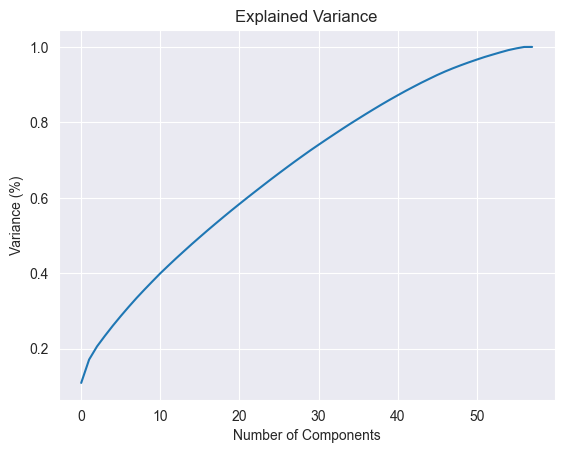

In [29]:
#Performing a PCA to dataset
from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(df1)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Explained Variance')
plt.grid(True)
plt.show()

In [33]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(df1)

# This will be the new data fed to the algorithm.
df2 = pd.DataFrame(data = new_data,
                            columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44'])

In [34]:
df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-0.959821,0.409823,-0.704486,0.050682,-0.290404,-0.307146,-0.092930,0.361619,1.749326,0.043836,...,0.343009,0.487789,0.034743,0.119701,0.184708,0.188262,0.260345,0.239176,-0.331675,0.404359
1,-1.577182,2.120007,0.145701,-0.496552,0.055004,-1.145675,-0.554123,0.248932,-0.301025,0.685906,...,-0.270177,-0.178206,-0.370077,-0.149041,0.004748,0.227990,0.323656,0.555147,0.073249,0.374558
2,-2.027952,4.587558,3.385684,-1.134242,1.772779,-1.325622,-3.197302,-1.350738,1.001344,-2.300255,...,2.077454,-0.474201,-0.509199,-0.224904,-0.439249,0.945753,0.777462,0.388794,0.144558,-0.965050
3,-1.069772,0.743211,-0.596143,-0.017631,-0.169031,0.719858,0.345694,-0.442620,-0.371258,-0.241925,...,0.315786,0.230980,0.077010,0.287760,-0.418629,0.519903,0.701088,-0.700730,0.299872,-0.302492
4,-1.070585,0.742552,-0.598283,-0.017898,-0.169053,0.720416,0.343967,-0.443948,-0.371584,-0.241124,...,0.315140,0.232196,0.078201,0.288167,-0.418578,0.520288,0.700368,-0.699220,0.299856,-0.301710


In [35]:
print(pca.explained_variance_)

[6.34931299 3.59100245 2.02185181 1.62967884 1.55865654 1.47438419
 1.41600731 1.36784087 1.29487523 1.25872154 1.24078433 1.16188956
 1.14582667 1.10620854 1.09853362 1.06508295 1.05388374 1.02942142
 1.01687857 1.001782   0.98030078 0.96921067 0.95332395 0.94501789
 0.93889945 0.91876232 0.9072809  0.89588367 0.87389175 0.86558833
 0.83274091 0.82201904 0.81026543 0.80465418 0.78866194 0.76105211
 0.75969701 0.74228381 0.72786595 0.70608178 0.68193301 0.67180703
 0.63897218 0.63183939]


In [36]:
print(pca.components_)

[[-0.05217651 -0.02532569 -0.05860725 ... -0.04370115 -0.05888216
  -0.16243746]
 [ 0.11983784  0.09668072  0.12556816 ...  0.20153974  0.17812554
   0.35400445]
 [-0.01556172 -0.01189192 -0.01805156 ...  0.47901626  0.40099137
  -0.06399323]
 ...
 [-0.14247961  0.18036596  0.00526297 ...  0.0583493   0.47259831
   0.03635793]
 [ 0.1446514   0.08380086  0.07061708 ...  0.03282148  0.12333772
   0.03415629]
 [ 0.12608729 -0.30382937  0.00869433 ... -0.03377477  0.30290015
   0.13068221]]


<AxesSubplot: xlabel='spam', ylabel='count'>

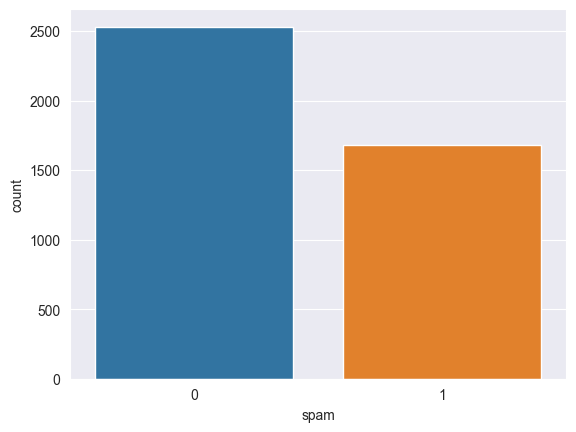

In [27]:
#plot spam vs non spam count
import seaborn as sns
sns.countplot(x='spam', data=df)

In [23]:
X = df.drop('spam', axis = 1)
Y = df['spam']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [39]:
# Perform feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
print(X_train.shape, '----> Training Feature Shape')
print(X_test.shape, '----> Training Feature Shape')
print(Y_train.shape, '----> Testing Labels Shape')
print(Y_test.shape, '----> Testing Feature Shape')

(3220, 57) ----> Training Feature Shape
(1381, 57) ----> Training Feature Shape
(3220,) ----> Testing Labels Shape
(1381,) ----> Testing Feature Shape


# Building KNN model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Perform grid search to find optimal value of k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print optimal value of k
print('Optimal value of k:', grid_search.best_params_['n_neighbors'])

Optimal value of k: 5


In [30]:
# Build KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, Y_train)

# Evaluate the model on testing set
Y_pred = knn.predict(X_test)

# Print evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1 Score:', f1_score(Y_test, Y_pred))

Accuracy: 0.8935939196525515
Precision: 0.8989071038251366
Recall: 0.8435897435897436
F1 Score: 0.8703703703703705


# Building the Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10, random_state = 42)
clf = clf.fit(X_train, Y_train)

In [20]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [21]:
predictions = clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(Y_test, predictions))
print('Precision:', precision_score(Y_test, predictions))
print('Recall', recall_score(Y_test, predictions))
print('F1 Score:', f1_score(Y_test,predictions))

Accuracy: 0.9094858797972484
Precision: 0.9109090909090909
Recall 0.8682842287694974
F1 Score: 0.8890860692102929


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predictions, labels=[0,1])

array([[755,  49],
       [ 76, 501]], dtype=int64)

In [24]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=['No-spam','spam']))

              precision    recall  f1-score   support

     No-spam       0.91      0.94      0.92       804
        spam       0.91      0.87      0.89       577

    accuracy                           0.91      1381
   macro avg       0.91      0.90      0.91      1381
weighted avg       0.91      0.91      0.91      1381



# Visualize the Decision Tree

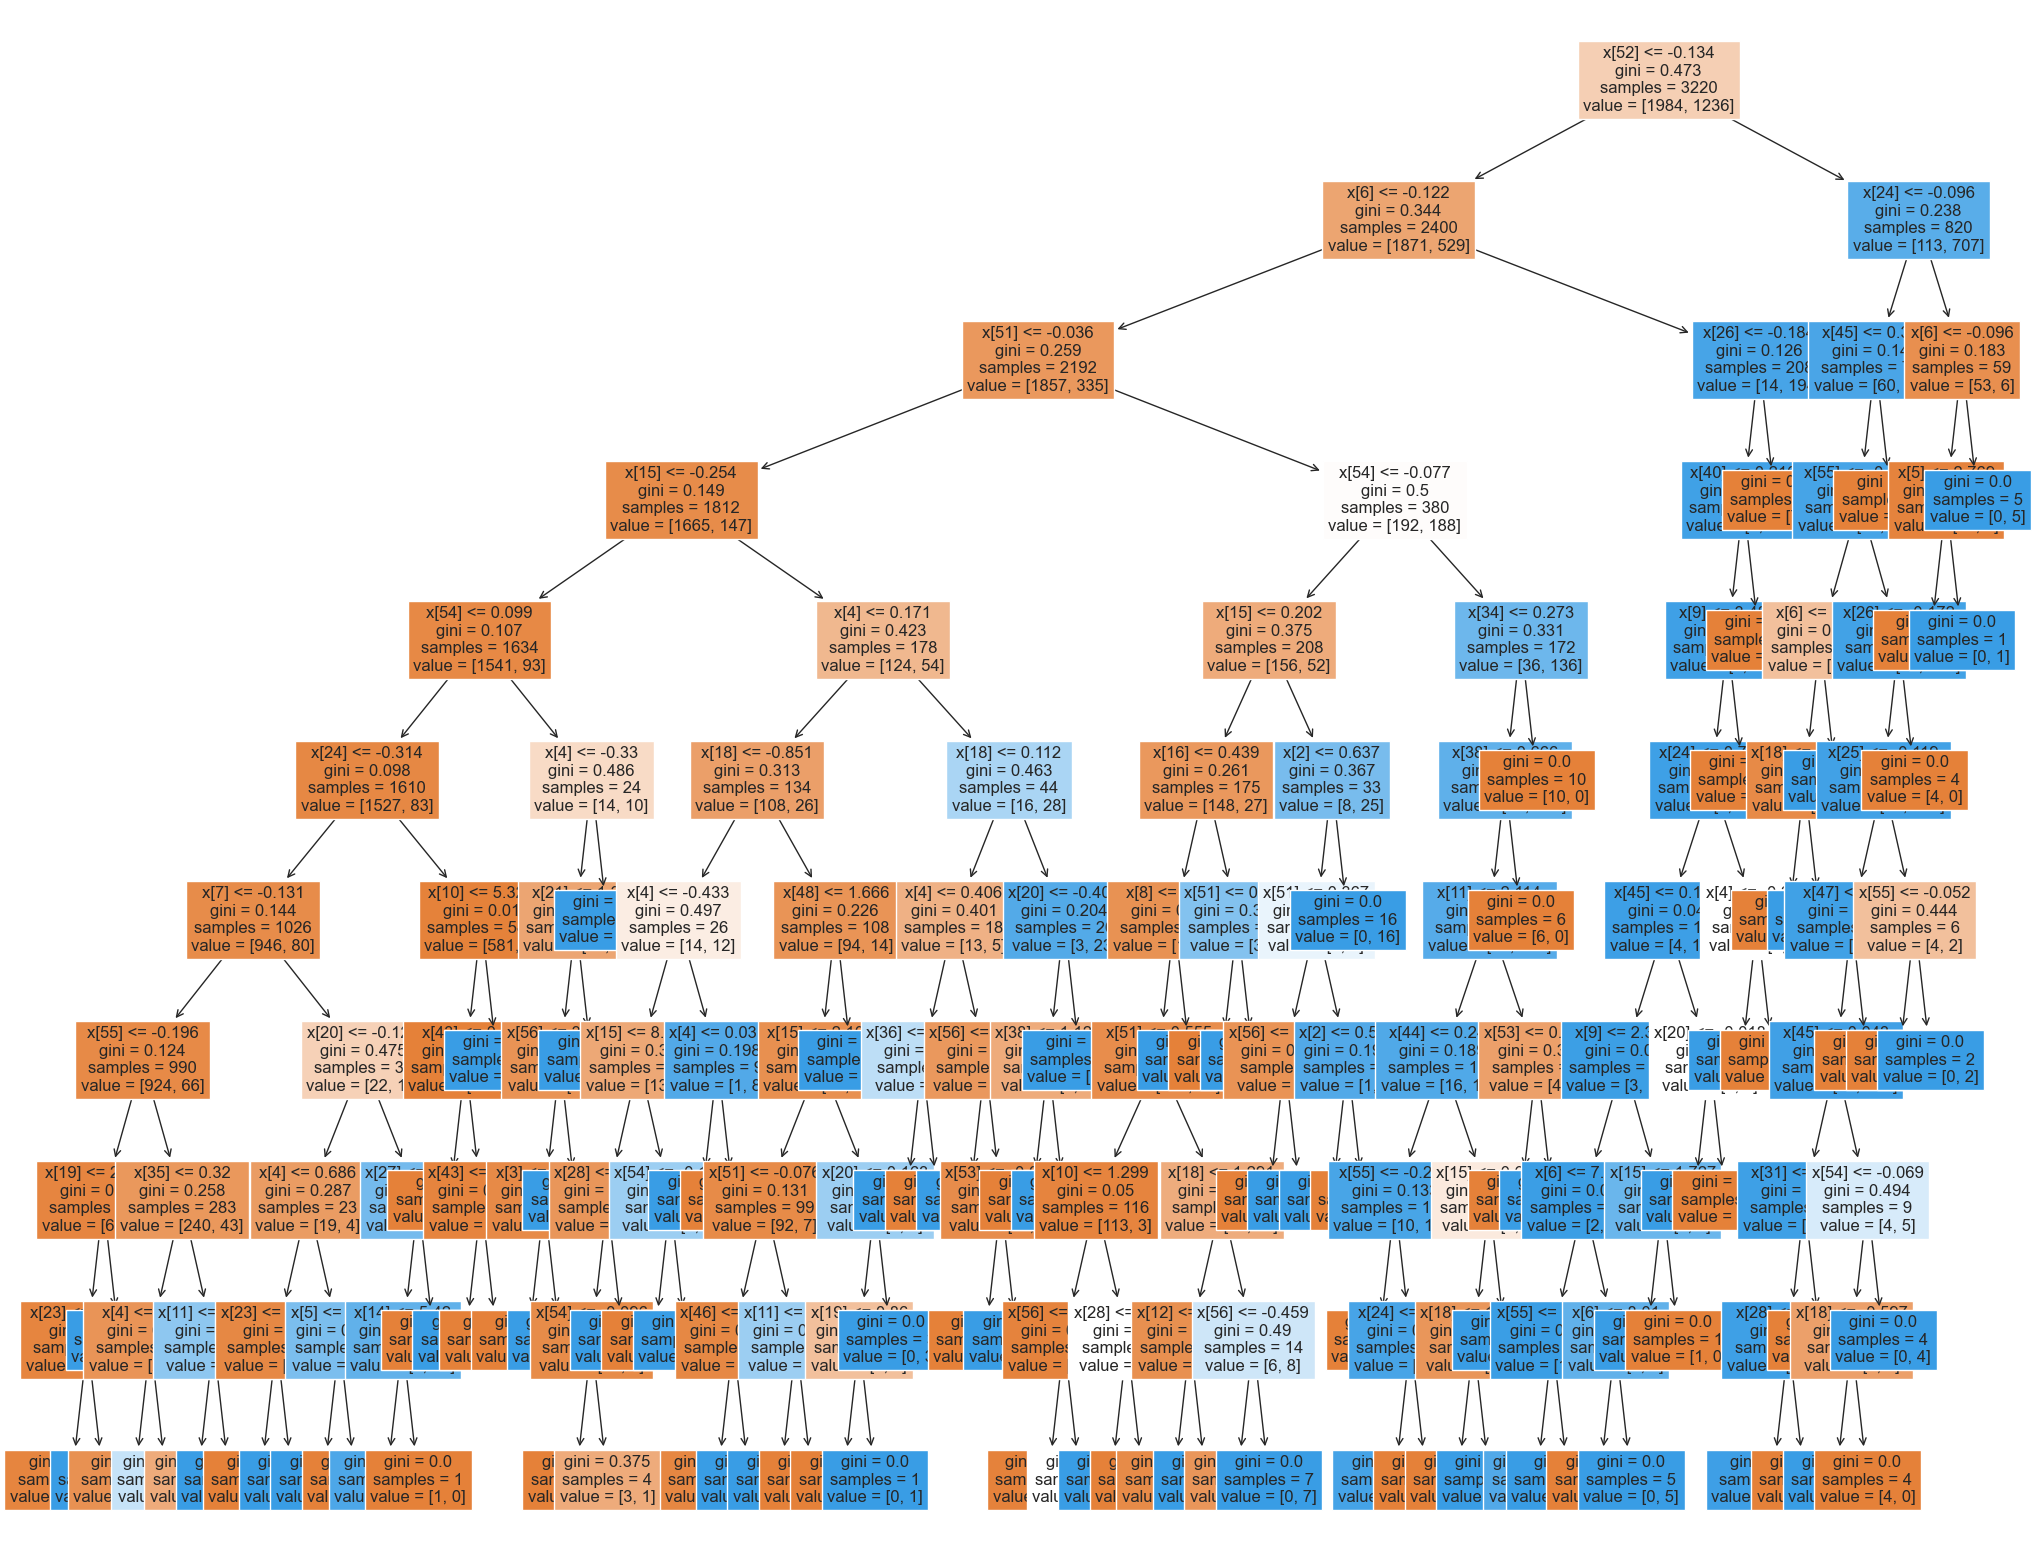

In [25]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True,
              fontsize=12)
plt.show()

In [26]:
#pruning the decision tree
clf = DecisionTreeClassifier(max_depth=10, random_state = 101, ccp_alpha=0.01)
clf = clf.fit(X_train, Y_train)

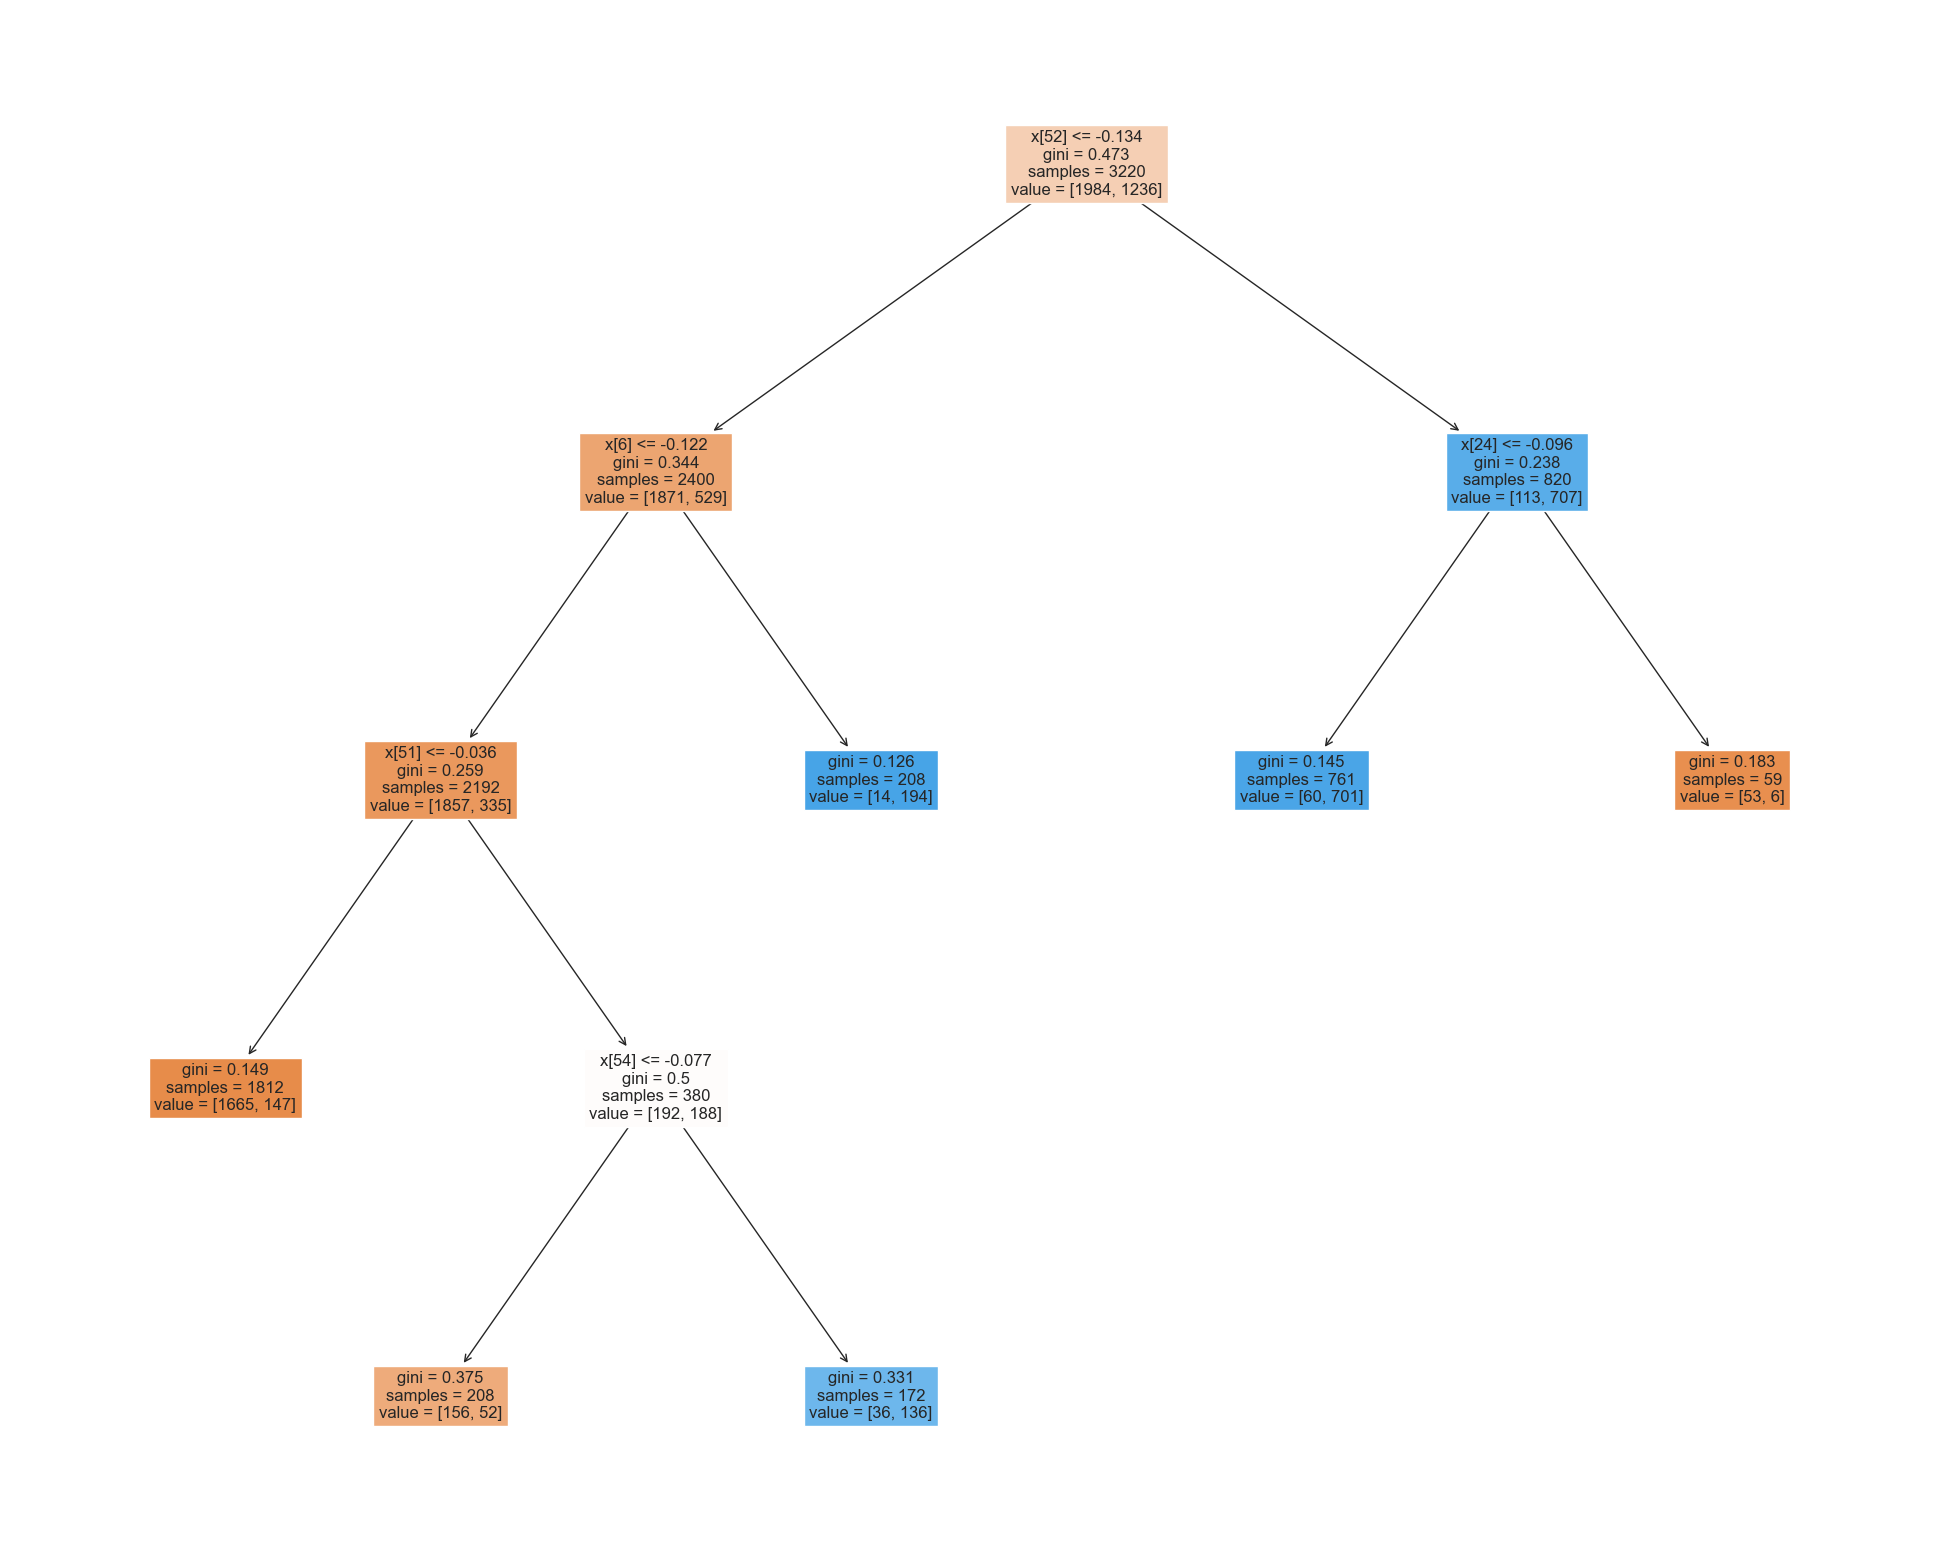

In [27]:
#visualizing the decision tree after pruning
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf,filled=True,
              fontsize=12)
plt.show()